In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 8)
plt.rcParams["font.size"] = 22

# 2-d Motion with quadratic drag

As a starting point, here are the parameters from the text:

In [2]:
g = 9.8 # m/s^2
v0 = 30 # m/s
theta = 50 * np.pi/180
c = 0 # quadratic drag coefficient - changed later
m = 0.15 # kg

This is the very same RK2 implementation that I used previously:

In [3]:
def rk2(y0, f, dt, t_final):
    """
    Given the rhs function f(t, y) and initial condition y, uses the 
    RK2 method to numerically integrate the ODE dy/dt = f(t, y) from
    0 to t_final using a timestep of dt
    """
    t = np.arange(0, t_final, dt)
    y = np.empty((len(y0), t.shape[0]))
    y[:,0] = y0
    for n in range(len(t)-1):
        k1 = np.asarray(f(t[n], y[:,n]))
        ystar = y[:,n] + .5 * dt * k1
        k2 = np.asarray(f(t[n]+.5*dt, ystar))
        y[:,n+1] = y[:,n] + dt * k2
    return t, y

And here is the main thing specific to solving the quadratic drag problem in 2-d.

The state of the system is 2 components of position (x, y) and 2 components of velocity (vx, vy). I put them into a single 4-element state vector in the order s = (x, vx, y, vy).

Given that, I need to calculate the r.h.s. of my ODE, ie.
$$\frac{d\vec s}{dt} = \vec f_{projectile\, drag}(t, \vec s)$$

where the function itself is given from Taylor's equation (2.61) for $v_x$ and $v_y$, and in addition $\dot x = v_x$ and $\dot y = v_y$.

I'm also setting the initial equation $\vec s_0$ here.

In [5]:
# solution vector s = (x, vx, y, vy)
# rhs of the ODE we're solving
def f_projectile_drag(t, s):
    x, vx, y, vy = s
    v = (vx**2 + vy**2)**.5
    return [vx, -c/m * v * vx, vy, -c/m * v * vy - g]

# initial condition
s0 = [0, v0 * np.cos(theta), 0, v0 * np.sin(theta)]

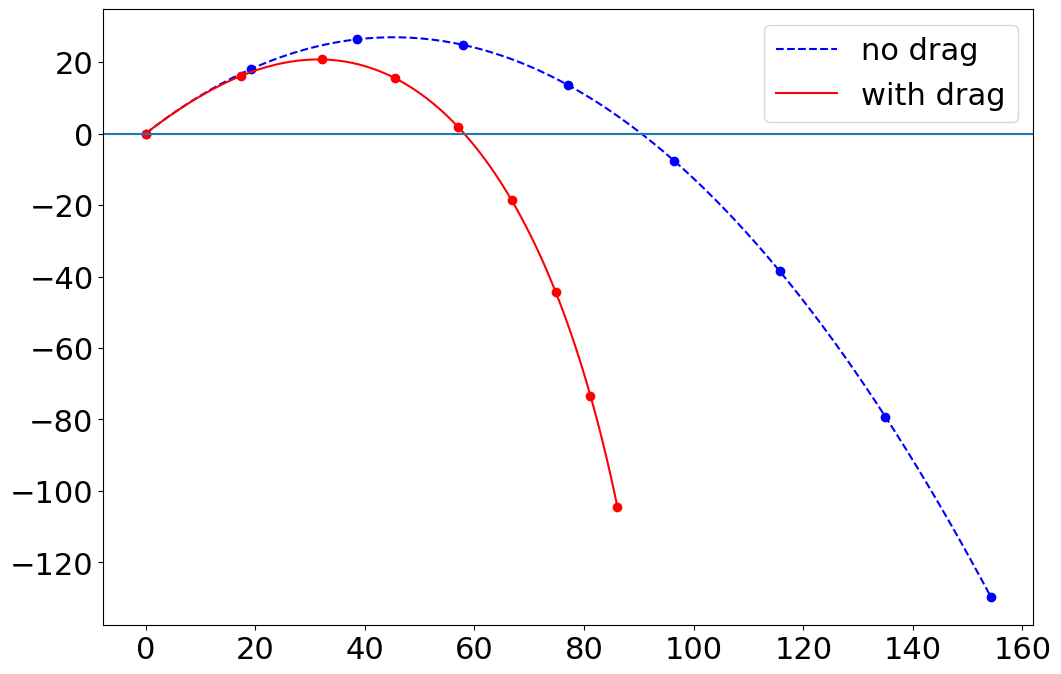

In [6]:
def integrate_and_plot_rk2(dt, t_final):
    global c
    ss = int(1/dt)
    # calculate and plot no drag trajectory first
    c = 0
    t, s = rk2(s0, f_projectile_drag, dt, t_final)
    plt.plot(s[0,:], s[2,:], '--', color='b', label='no drag');
    plt.plot(s[0,::ss], s[2,::ss], 'o', color='b');
    # then do trajectory with drag
    c = 0.25 * .07**2
    t, s = rk2(s0, f_projectile_drag, dt, t_final)
    plt.plot(s[0,:], s[2,:], '-', color='r', label='with drag');
    plt.plot(s[0,::ss], s[2,::ss], 'o', color='r');
#     plt.plot(t, s[0,:], '-o', label='$x$');
#     plt.plot(t, s[1,:], '-o', label='$v_x$');
#     plt.plot(t, s[2,:], '-o', label='$y$');
#     plt.plot(t, s[3,:], '-o', label='$v_y$');
    plt.axhline(0)
#    plt.xlim(0, 10)
    plt.legend()
    
integrate_and_plot_rk2(dt=.1, t_final=8.01)

This does look qualitatively and quantitatively like the plot in the text, so yay!

(Of course one can now easily play with parameters, e.g., experiment with what initial angle will give the best chance for a home run...)